## Preliminaries

In [46]:
import pandas as pd
import numpy as np
import PyPDF2
import textract
import re
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

## Reading Text

- converted PDF file to txt format for better pre-processing

In [47]:
filename ='06086785.pdf' 

pdfFileObj = open(filename,'rb')               #open allows you to read the file
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)   #The pdfReader variable is a readable object that will be parsed
num_pages = pdfReader.numPages                 #discerning the number of pages will allow us to parse through all the pages


count = 0
text = ""
                                                            
while count < num_pages:                       #The while loop will read each page
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()
    
#Below if statement exists to check if the above library returned #words. It's done because PyPDF2 cannot read scanned files.

if text != "":
    text = text
    
#If the above returns as False, we run the OCR library textract to #convert scanned/image based PDF files into text

else:
    text = textract.process('http://bit.ly/epo_keyword_extraction_document', method='tesseract', language='eng')

    # Now we have a text variable which contains all the text derived from our PDF file.

[('laboratori', 82), ('remot', 74), ('labshar', 39), ('develop', 28), ('includ', 22), ('access', 21), ('provid', 19), ('toolkit', 19), ('inform', 18), ('implement', 13)]


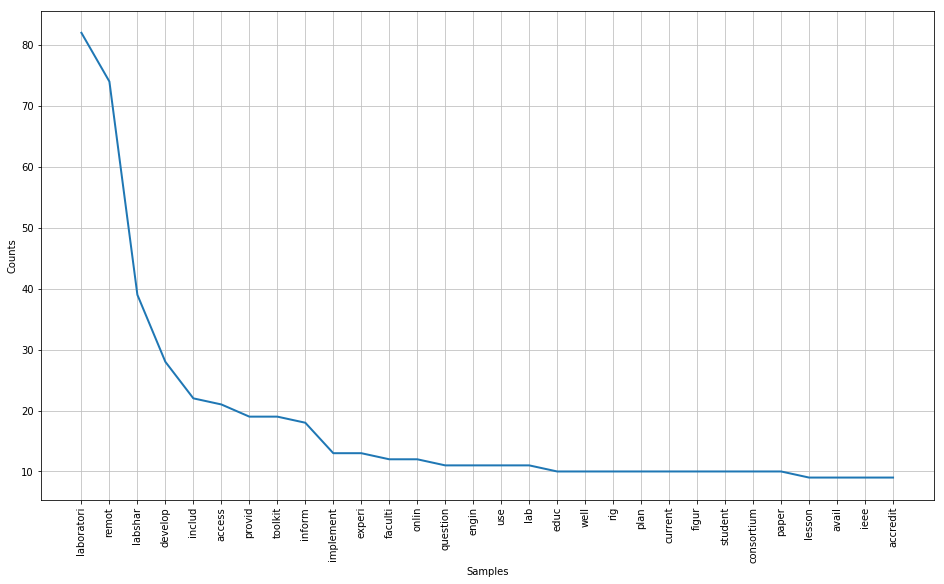

In [48]:
text = text.encode('ascii','ignore').lower().decode("utf-8")   #Lowercasing each word
text = re.sub('[^a-zA-Z]', ' ', text) #Remove punctuations

tokenized_words = word_tokenize(text)

stop_words = set(stopwords.words('english'))

filtered_words = []
for w in tokenized_words:
    if w not in stop_words:
        filtered_words.append(w)
        
ps = PorterStemmer()
stemmed_words=[]
for w in filtered_words:
    stemmed_words.append(ps.stem(w))
    
lem = WordNetLemmatizer()

lemmed_words=[]
for w in stemmed_words:
    lemmed_words.append(lem.lemmatize(w))

fdist= FreqDist(lemmed_words)
print(fdist.most_common(10))
plt.figure(figsize=(16,9))
fdist.plot(30, cumulative=False)
plt.show()